In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
houses = np.zeros((10,10))
blue_filled = 0
red_filled = 0
while(blue_filled < 20):
    x = int(np.random.random()*10)
    y = int(np.random.random()*10)
    if(houses[x,y] == 0):
        houses[x,y] = 1
        blue_filled += 1
while(red_filled < 20):
    x = int(np.random.random()*10)
    y = int(np.random.random()*10)
    if(houses[x,y] == 0):
        houses[x,y] = -1
        red_filled += 1

In [13]:
print(houses)
print(houses[0,:])
print(houses[:,0])
houses_start = houses

[[ 0. -1. -1. -1.  0.  0.  1. -1.  0.  1.]
 [ 1. -1.  0.  0.  1.  1.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0. -1.  0.]
 [ 0. -1.  0.  0. -1.  1.  0.  0. -1.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  1. -1.]
 [-1.  0.  0. -1. -1. -1. -1.  0.  0. -1.]
 [ 0.  1.  1. -1.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0. -1.  0.  0.  1.]]
[ 0. -1. -1. -1.  0.  0.  1. -1.  0.  1.]
[ 0.  1.  0.  0.  0.  0. -1.  0.  0.  0.]


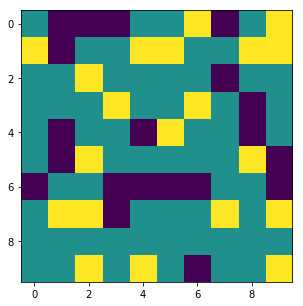

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(houses,interpolation="None")
plt.show()

In [15]:
def neighborValues(x, y):
    if(x == 0):
        if(y == 0):
            return [houses[1,0], houses[1,1], houses[0,1]]
        elif(y == 9):
            return [houses[0,8], houses[1,8], houses[1,9]]
        else:
            return [houses[x,y-1], houses[x+1,y-1], houses[x+1,y], houses[x+1,y+1], houses[x,y+1]]
    elif(x == 9):
        if(y == 0):
            return [houses[8,0], houses[8,1], houses[9,1]]
        elif(y == 9):
            return [houses[9,8], houses[8,8], houses[8,9]]
        else:
            return [houses[x,y-1], houses[x-1,y-1], houses[x-1,y], houses[x-1,y+1], houses[x,y+1]]
    elif((y == 0) & (x != 0) & (x !=9)):
        return [houses[x-1,y], houses[x-1,y+1], houses[x,y+1], houses[x+1,y+1], houses[x+1,y]]
    elif((y == 9) & (x != 0) & (x !=9)):
        return [houses[x-1,y], houses[x-1,y-1], houses[x,y-1], houses[x+1,y-1], houses[x+1,y]]
    else:
        return [houses[x,y-1], houses[x+1,y-1], houses[x+1,y], houses[x+1,y+1], houses[x,y+1], houses[x-1,y+1], houses[x-1,y], houses[x-1,y-1]]

In [16]:
print(neighborValues(8,4))
print(neighborValues(9,9))
neighborValues(1,1)

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0]
[0.0, 0.0, 0.0]


[1.0, 0.0, 0.0, 1.0, 0.0, -1.0, -1.0, 0.0]

In [17]:
def funcion(x):
    if (x <= 0.5):
        return 2*x
    else:
        return -x + 1.5

In [18]:
def probability(value, list_neighbors):
    num = 0
    for neighbor in (list_neighbors):
        if(neighbor == value):
            num += 1
    prob = num/len(list_neighbors)
    return funcion(prob)
    #hacer funcion happy, interpolar!

In [19]:
def happier(value, x, y, newx, newy):
    neighbors_before = neighborValues(x, y)
    neighbors_after = neighborValues(newx, newy)
    before = probability (value, neighbors_before)
    after  = probability (value, neighbos_after)
    if(before < after):
        return true

In [ ]:
moves = 0
while moves <= 100:
    x_index = int(10*np.random.random())
    y_index = int(10*np.random.random())
    if(houses[x_index, y_index] != 0):
        value = houses[x_index, y_index]
        new_x = int(10*np.random.random())
        new_y = int(10*np.random.random())
        if(houses[x_index, y_index] == 0 and happier(value, x_index, y_index, new_x, new_y)):
            houses[x_index, y_index] = 0
            houses[new_x, new_y] = value
            moves += 1

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(houses,interpolation="None")
plt.show()

In [ ]:
moves = 0
while moves <= 500:
    x_index = int(10*np.random.random())
    y_index = int(10*np.random.random())
    if(houses[x_index, y_index] != 0):
        value = houses[x_index, y_index]
        new_x = int(10*np.random.random())
        new_y = int(10*np.random.random())
        if(houses[x_index, y_index] == 0 and happier(value, x_index, y_index, new_x, new_y)):
            houses[x_index, y_index] = 0
            houses[new_x, new_y] = value
            moves += 1
plt.figure(figsize=(5,5))
plt.imshow(houses,interpolation="None")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(houses_start,interpolation="None")
plt.title("Before")
plt.subplot(1,2,2)
plt.imshow(houses,interpolation="None")
plt.title("End")
plt.show()